In [1]:
# Import dependencies
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import homicide data
murders_df = pd.read_csv("Resources/murders_clean.csv")
murders_df.head()

,RecordId,AgencyName,AgencyType,County,State,Year,Month,Incident,CrimeType,CrimeSolved,...,VictimRace,VictimEthnicity,PerpetratorSex,PerpetratorAge,PerpetratorRace,PerpetratorEthnicity,Relationship,Weapon,VictimCount,PerpetratorCount
0,1068,Alameda,Sheriff,Alameda,California,1980,April,1,Murder or Manslaughter,No,...,White,Unknown,Unknown,0,Unknown,Unknown,Unknown,Knife,0,1
1,1069,Alameda,Sheriff,Alameda,California,1980,August,1,Murder or Manslaughter,Yes,...,White,Not Hispanic,Male,39,White,Not Hispanic,Son,Handgun,0,0
2,1070,Alameda,Sheriff,Alameda,California,1980,October,1,Murder or Manslaughter,No,...,Black,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Fire,0,1
3,1071,Alameda,Sheriff,Alameda,California,1980,November,1,Murder or Manslaughter,No,...,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Knife,0,0
4,1072,Alameda,Sheriff,Alameda,California,1980,November,2,Murder or Manslaughter,No,...,White,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Knife,0,0


In [3]:
le = LabelEncoder()
murders_df['CrimeSolved'] = le.fit_transform(murders_df['CrimeSolved'])
murders_df.head()

,RecordId,AgencyName,AgencyType,County,State,Year,Month,Incident,CrimeType,CrimeSolved,...,VictimRace,VictimEthnicity,PerpetratorSex,PerpetratorAge,PerpetratorRace,PerpetratorEthnicity,Relationship,Weapon,VictimCount,PerpetratorCount
0,1068,Alameda,Sheriff,Alameda,California,1980,April,1,Murder or Manslaughter,0,...,White,Unknown,Unknown,0,Unknown,Unknown,Unknown,Knife,0,1
1,1069,Alameda,Sheriff,Alameda,California,1980,August,1,Murder or Manslaughter,1,...,White,Not Hispanic,Male,39,White,Not Hispanic,Son,Handgun,0,0
2,1070,Alameda,Sheriff,Alameda,California,1980,October,1,Murder or Manslaughter,0,...,Black,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Fire,0,1
3,1071,Alameda,Sheriff,Alameda,California,1980,November,1,Murder or Manslaughter,0,...,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Knife,0,0
4,1072,Alameda,Sheriff,Alameda,California,1980,November,2,Murder or Manslaughter,0,...,White,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Knife,0,0


In [4]:
# Examine shape of dataset
murders_df.shape

(99783, 22)

In [5]:
# Determine the number of unique values in each column.
murders_df.nunique()

RecordId                99783
AgencyName                613
AgencyType                  4
County                     58
State                       1
Year                       35
Month                      12
Incident                  131
CrimeType                   2
CrimeSolved                 2
VictimSex                   3
VictimAge                 101
VictimRace                  5
VictimEthnicity             3
PerpetratorSex              3
PerpetratorAge             96
PerpetratorRace             5
PerpetratorEthnicity        3
Relationship               28
Weapon                     15
VictimCount                11
PerpetratorCount           11
dtype: int64

In [6]:
# Inspect values in the Relationship column.
murders_df["Relationship"].value_counts()

Unknown                 45050
Stranger                23827
Acquaintance             9597
Friend                   5964
Wife                     2961
Girlfriend               2336
Son                      1299
Daughter                 1087
Family                   1067
Neighbor                  989
Husband                   804
Boyfriend                 710
Mother                    622
Brother                   603
Father                    521
In-Law                    487
Boyfriend/Girlfriend      407
Common-Law Wife           310
Ex-Wife                   194
Stepfather                169
Common-Law Husband        166
Sister                    146
Employer                  125
Stepson                   119
Stepdaughter               90
Employee                   58
Ex-Husband                 49
Stepmother                 26
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Relationship'>

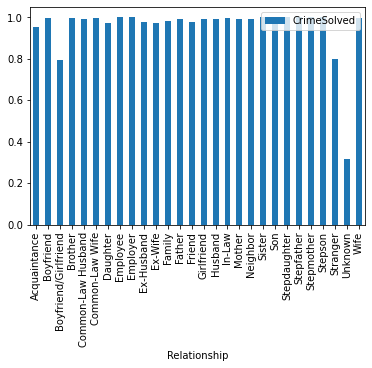

In [7]:
# Compare solve rates for Relationship values
solved_relationship = murders_df.groupby(["Relationship"]).mean()["CrimeSolved"]
solved_relationship_df = pd.DataFrame(solved_relationship)
solved_relationship_df.plot(kind="bar")

In [8]:
# Inspect values in the Weapon column.
murders_df["Weapon"].value_counts()

Handgun          55429
Knife            14989
Blunt Object     10195
Shotgun           4371
Firearm           4327
Rifle             4103
Unknown           2533
Strangulation     1865
Suffocation        760
Fire               624
Drowning           240
Drugs              180
Poison              77
Explosives          50
Gun                 40
Name: Weapon, dtype: int64

<AxesSubplot:xlabel='Weapon'>

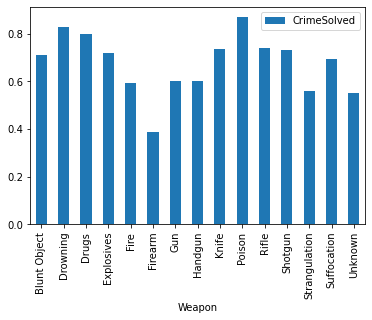

In [9]:
# Compare solve rates for Weapon values
solved_weapon = murders_df.groupby(["Weapon"]).mean()["CrimeSolved"]
solved_weapon_df = pd.DataFrame(solved_weapon)
solved_weapon_df.plot(kind="bar")

In [10]:
# Inspect values in the Victim Sex column.
murders_df["VictimSex"].value_counts()

Male       81007
Female     18743
Unknown       33
Name: VictimSex, dtype: int64

<AxesSubplot:xlabel='VictimSex'>

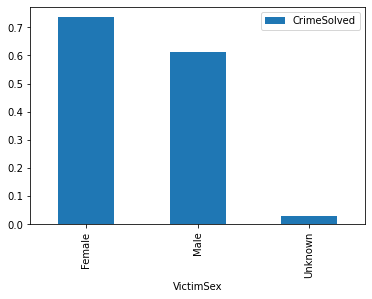

In [11]:
# Compare solve rates for Victim Sex values
solved_gender = murders_df.groupby(["VictimSex"]).mean()["CrimeSolved"]
solved_gender_df = pd.DataFrame(solved_gender)
solved_gender_df.plot(kind="bar")

In [12]:
# Inspect values in the Victim Race column.
murders_df["VictimRace"].value_counts()

White                            64621
Black                            28805
Asian/Pacific Islander            3849
Unknown                           1995
Native American/Alaska Native      513
Name: VictimRace, dtype: int64

<AxesSubplot:xlabel='VictimRace'>

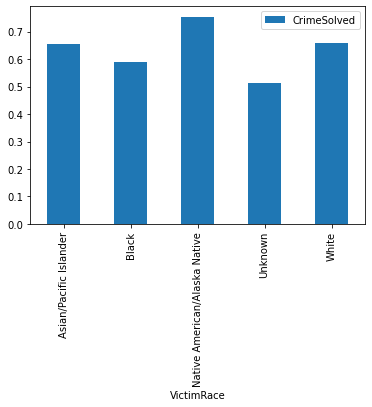

In [13]:
# Compare solve rates for Victim Race values
solved_race = murders_df.groupby(["VictimRace"]).mean()["CrimeSolved"]
solved_race_df = pd.DataFrame(solved_race)
solved_race_df.plot(kind="bar")

In [14]:
# Inspect values in the Victim Ethnicity column.
murders_df["VictimEthnicity"].value_counts()

Not Hispanic    54179
Hispanic        37002
Unknown          8602
Name: VictimEthnicity, dtype: int64

<AxesSubplot:xlabel='VictimEthnicity'>

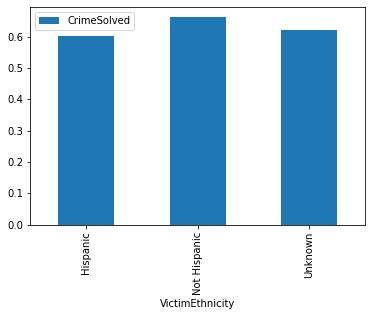

In [15]:
# Compare solve rates for Victim Ethnicity values
solved_ethnicity = murders_df.groupby(["VictimEthnicity"]).mean()["CrimeSolved"]
solved_ethnicity_df = pd.DataFrame(solved_ethnicity)
solved_ethnicity_df.plot(kind="bar")

<AxesSubplot:xlabel='County'>

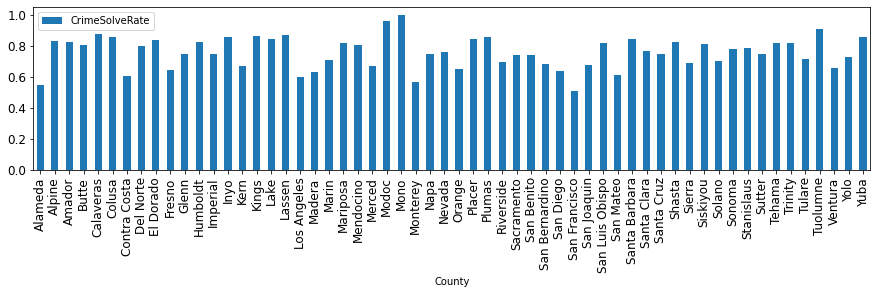

In [16]:
# Compare solve rates for County values
solved_county = murders_df.groupby(["County"]).mean()["CrimeSolved"]
solved_county_df = pd.DataFrame(solved_county)
solved_county_df.rename(columns={"CrimeSolved":"CrimeSolveRate"}, inplace=True)
solved_county_df.plot(kind="bar", figsize=[15,3], fontsize=12)

In [17]:
# Import county demographics data
county_df = pd.read_csv("Resources/county_clean.csv")
county_df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Employed,Unemployment
0,6001,California,Alameda,1584983,776699,808284,22.6,33.0,11.3,0.3,...,0.8,1025865,75619.0,613.0,37285,279,12.5,15.2,778132,8.3
1,6003,California,Alpine,1131,654,477,9.5,64.1,1.0,19.4,...,1.4,865,52917.0,13603.0,21415,3057,17.5,8.5,408,10.7
2,6005,California,Amador,36995,20012,16983,12.9,79.7,2.2,1.8,...,0.1,30376,54171.0,4208.0,27473,2016,12.8,22.5,12573,14.0
3,6007,California,Butte,222564,110115,112449,15.2,73.8,1.4,0.7,...,0.2,169724,43444.0,1068.0,24259,637,21.9,23.9,89411,12.1
4,6009,California,Calaveras,44767,22143,22624,11.1,82.5,0.6,0.9,...,0.3,35415,53233.0,3774.0,29553,1398,12.6,13.3,16248,12.1


In [18]:
# Examine shape of dataset
county_df.shape

(58, 21)

In [19]:
# Add CrimeSolveRate Column to County Data
county_df = pd.merge(county_df, solved_county_df, on="County", how="inner")
county_df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Employed,Unemployment,CrimeSolveRate
0,6001,California,Alameda,1584983,776699,808284,22.6,33.0,11.3,0.3,...,1025865,75619.0,613.0,37285,279,12.5,15.2,778132,8.3,0.547829
1,6003,California,Alpine,1131,654,477,9.5,64.1,1.0,19.4,...,865,52917.0,13603.0,21415,3057,17.5,8.5,408,10.7,0.833333
2,6005,California,Amador,36995,20012,16983,12.9,79.7,2.2,1.8,...,30376,54171.0,4208.0,27473,2016,12.8,22.5,12573,14.0,0.827586
3,6007,California,Butte,222564,110115,112449,15.2,73.8,1.4,0.7,...,169724,43444.0,1068.0,24259,637,21.9,23.9,89411,12.1,0.803681
4,6009,California,Calaveras,44767,22143,22624,11.1,82.5,0.6,0.9,...,35415,53233.0,3774.0,29553,1398,12.6,13.3,16248,12.1,0.878788


In [20]:
# Add CitizenPct and EmployedPct column to County Data
county_df["CitizenPct"] = county_df["Citizen"]/county_df["TotalPop"]
county_df["EmployedPct"] = county_df["Employed"]/county_df["TotalPop"]
county_df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Employed,Unemployment,CrimeSolveRate,CitizenPct,EmployedPct
0,6001,California,Alameda,1584983,776699,808284,22.6,33.0,11.3,0.3,...,613.0,37285,279,12.5,15.2,778132,8.3,0.547829,0.647240,0.490940
1,6003,California,Alpine,1131,654,477,9.5,64.1,1.0,19.4,...,13603.0,21415,3057,17.5,8.5,408,10.7,0.833333,0.764810,0.360743
2,6005,California,Amador,36995,20012,16983,12.9,79.7,2.2,1.8,...,4208.0,27473,2016,12.8,22.5,12573,14.0,0.827586,0.821084,0.339857
3,6007,California,Butte,222564,110115,112449,15.2,73.8,1.4,0.7,...,1068.0,24259,637,21.9,23.9,89411,12.1,0.803681,0.762585,0.401732
4,6009,California,Calaveras,44767,22143,22624,11.1,82.5,0.6,0.9,...,3774.0,29553,1398,12.6,13.3,16248,12.1,0.878788,0.791096,0.362946


<AxesSubplot:xlabel='TotalPop', ylabel='CrimeSolveRate'>

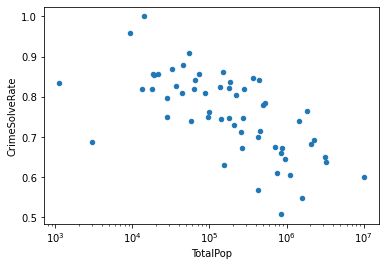

In [21]:
# Compare solve rates and total population
county_df.plot(x="TotalPop", y="CrimeSolveRate", kind="scatter", logx=True)

<AxesSubplot:xlabel='Hispanic', ylabel='CrimeSolveRate'>

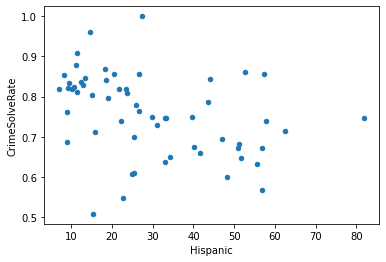

In [22]:
# Compare solve rates and percent Hispanic
county_df.plot(x="Hispanic", y="CrimeSolveRate", kind="scatter")

<AxesSubplot:xlabel='White', ylabel='CrimeSolveRate'>

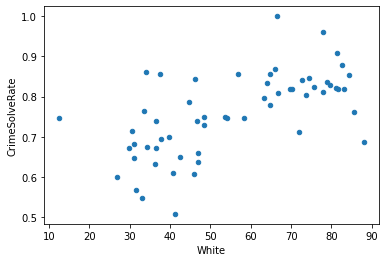

In [23]:
# Compare solve rates and percent White
county_df.plot(x="White", y="CrimeSolveRate", kind="scatter")

<AxesSubplot:xlabel='Black', ylabel='CrimeSolveRate'>

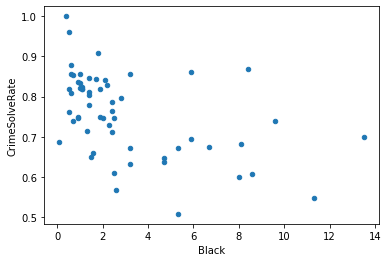

In [24]:
# Compare solve rates and percent Black
county_df.plot(x="Black", y="CrimeSolveRate", kind="scatter")

<AxesSubplot:xlabel='Native', ylabel='CrimeSolveRate'>

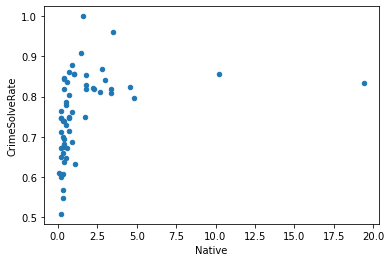

In [25]:
# Compare solve rates and percent Native
county_df.plot(x="Native", y="CrimeSolveRate", kind="scatter")

<AxesSubplot:xlabel='Asian', ylabel='CrimeSolveRate'>

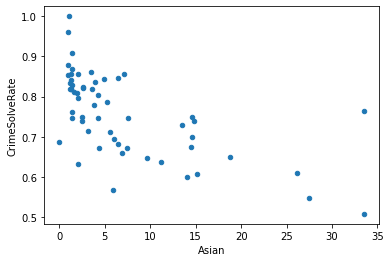

In [26]:
# Compare solve rates and percent Asian
county_df.plot(x="Asian", y="CrimeSolveRate", kind="scatter")

<AxesSubplot:xlabel='CitizenPct', ylabel='CrimeSolveRate'>

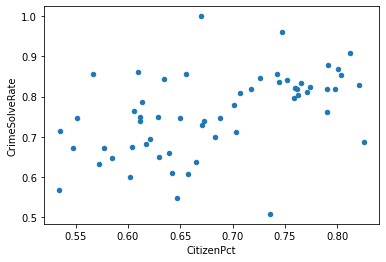

In [27]:
# Compare solve rates and percent citizens
county_df.plot(x="CitizenPct", y="CrimeSolveRate", kind="scatter")

<AxesSubplot:xlabel='Income', ylabel='CrimeSolveRate'>

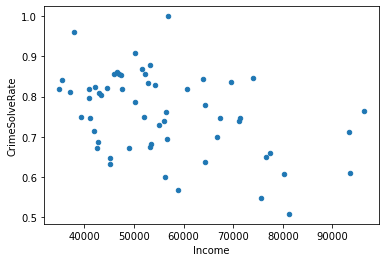

In [28]:
# Compare solve rates and average income
county_df.plot(x="Income", y="CrimeSolveRate", kind="scatter")

<AxesSubplot:xlabel='IncomePerCap', ylabel='CrimeSolveRate'>

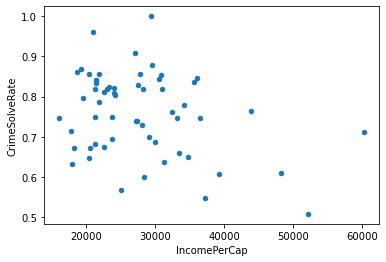

In [29]:
# Compare solve rates and income per capita
county_df.plot(x="IncomePerCap", y="CrimeSolveRate", kind="scatter")

<AxesSubplot:xlabel='Poverty', ylabel='CrimeSolveRate'>

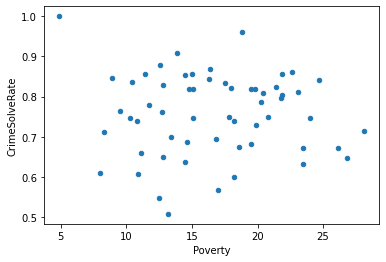

In [30]:
# Compare solve rates and poverty
county_df.plot(x="Poverty", y="CrimeSolveRate", kind="scatter")

<AxesSubplot:xlabel='EmployedPct', ylabel='CrimeSolveRate'>

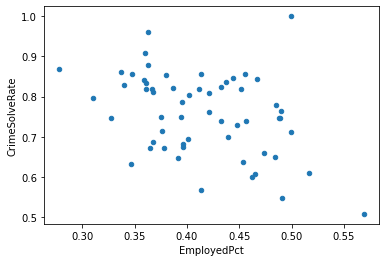

In [31]:
# Compare solve rates and percent employed
county_df.plot(x="EmployedPct", y="CrimeSolveRate", kind="scatter")

<AxesSubplot:xlabel='Unemployment', ylabel='CrimeSolveRate'>

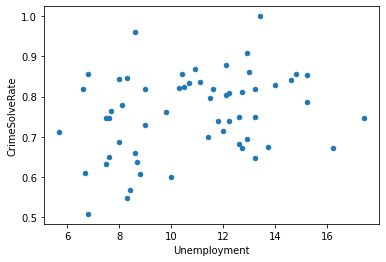

In [32]:
# Compare solve rates and unemployment
county_df.plot(x="Unemployment", y="CrimeSolveRate", kind="scatter")